# NHANES Exploratory Data Analysis II

## Introduction
This is an Exploratory Data Analysis using Python of the "NHANES" dataset. The purpose of this project is to find out and visualize the data's main characteristics and trends using statistical methods and data visualization techniques.


## About the data
The National Health and Nutrition Examination Survey (NHANES) dataset can be found on the [CDC - Centers for Disease Control and Prevention website](https://www.cdc.gov/nchs/nhanes/). It  is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. 

For two-year cycles (e.g., 2015-2016), cross-sectional national samples of individuals living in the United States are invited to participate in both aspects of the data collection. The data produced are widely considered by the research community as among the most important scientific indicators of the health and well-being of the U.S. population.

For this exploratory analysis, we will be analyzing data collected from a national sample of individuals during the 2015-2016 cycle. 


## Objective
The purpose of this analysis is to answer the following questions:
* Is there a relationship between the first and second blood pressure readings?
* Does a combination of age and gender have a significant effect on educational attainment?
* Does a combination of age and gender have a significant effect on BMI?
* Is there a significant relationship between ethnicity and medical insurance cover?



## Data Preparation

##### Importing libraries and loading dataset


In [1]:
# Importing libraries, loading dataset and retrieving column names

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats
from scipy.stats import linregress

da = pd.read_csv("nhanes_2015_2016.csv")

##### Retrieving column names and data types

In [2]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Data Processing

#### Checking for missing data

In [4]:
missing_data = da.isna().sum().sort_values(ascending=False)
missing_data

ALQ110      4004
ALQ130      2356
HIQ210      1003
INDFMPIR     601
ALQ101       527
BMXLEG       390
BMXWAIST     367
BPXDI1       334
BPXSY1       334
BMXARMC      308
BMXARML      308
DMDEDUC2     261
DMDMARTL     261
BPXDI2       200
BPXSY2       200
BMXBMI        73
BMXWT         69
BMXHT         62
DMDCITZN       1
SEQN           0
SDMVPSU        0
WTINT2YR       0
DMDHHSIZ       0
RIDRETH1       0
RIDAGEYR       0
RIAGENDR       0
SMQ020         0
SDMVSTRA       0
dtype: int64

#### Checking for duplicates

In [5]:
da['SEQN'].duplicated().any()

False

## Data Analysis & Visualizations

### Correlations

### 1. Between the two Diastolic Blood Pressure readings?

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

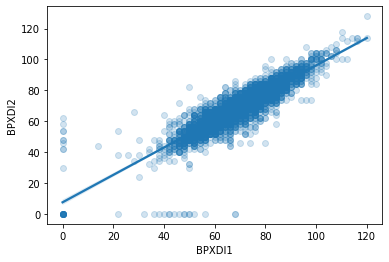

In [36]:
# mitigating against overplotting with the use of an "alpha" channel

sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=True, scatter_kws={"alpha": 0.2})

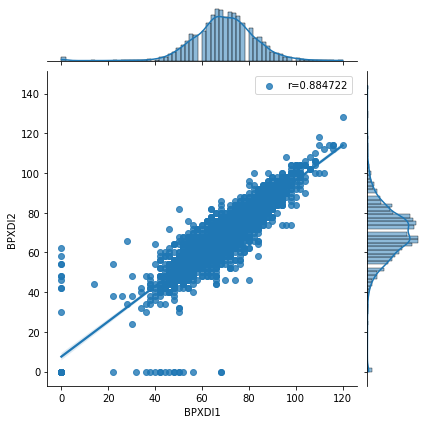

In [40]:
# making a plot of the density of plots

dx=sns.jointplot(x=da['BPXDI1'], y=da['BPXDI2'], kind='reg')
r = da['BPXDI1'].corr(da['BPXDI2'])
dx.ax_joint.legend(['r={:2f}'.format(r)]) 

**Observation:** The above plot shows that the Pearson correlation coefficient between the repeated measures of diastolics blood pressure is 0.88. This shows a strong positive dependence between the repeated measures.

### 2.Between the two Diastolic readings & the two Systolic Readings?

In [3]:
dx = pd.DataFrame(data=da, columns=['BPXSY1', 'BPXSY2','BPXDI1', 'BPXDI2'])
matrix = dx.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
          BPXSY1    BPXSY2    BPXDI1    BPXDI2
BPXSY1  1.000000  0.962287  0.316531  0.277681
BPXSY2  0.962287  1.000000  0.329843  0.303847
BPXDI1  0.316531  0.329843  1.000000  0.884722
BPXDI2  0.277681  0.303847  0.884722  1.000000


**From the above correlation matrix, it can be seen that;**
* There is  a slightly weaker correlation between repeated measurements of diastolic blood pressure compared to the repeated measurements of systolic blood pressure indicating a more perfect positive dependence between the systolic measurements
* The second systolic and second diastolic blood pressure measure is slightly less correlated than the first systolic and first diastolic blood pressure measure

### 3. Between the first readings of the Systolic and Diastolic Blood Pressures

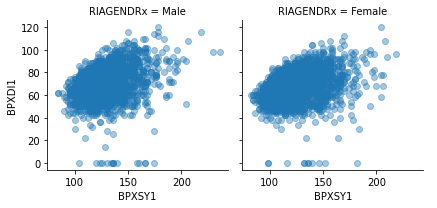

In [54]:
# Stratifying the plots by gender (rows) 
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.4).add_legend()

**Observation:** The gender-stratified plot above indicates that men and women tend to have similar first readings for disatolic and systolic measures and this is reflected in the fact that the cloud of points are shifted slightly up and to the right on both plots, showing a moderate correlation in both plots. 


### 4. Between Ethnicity & Gender

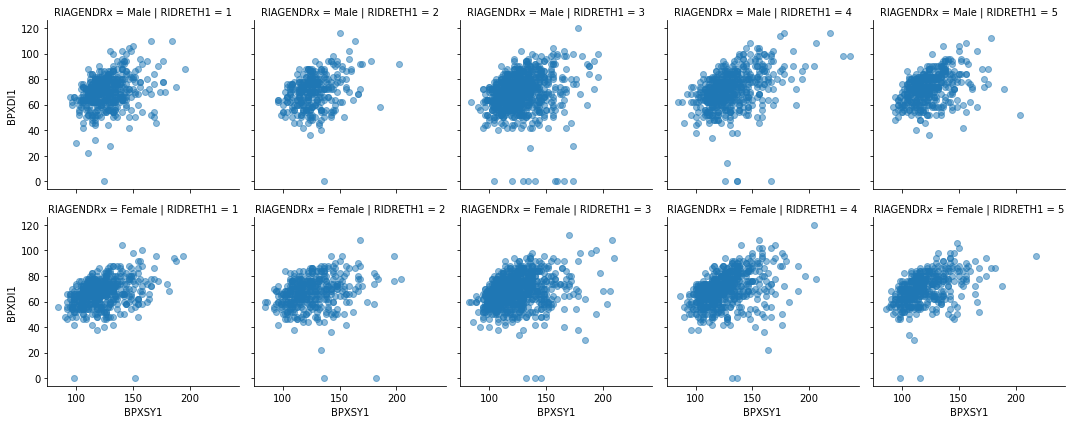

In [42]:
# Stratifying by race/ethnicity groups (columns).
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

**One notable observation is** that the two blood pressure variables within the different demographic subgroups all seem to be moderately correlated. However, there seems to be a smaller sample size for the 'Other Hispanic' ethnic group

### 5. Distributions of  Educational Attainment by Age & Gender

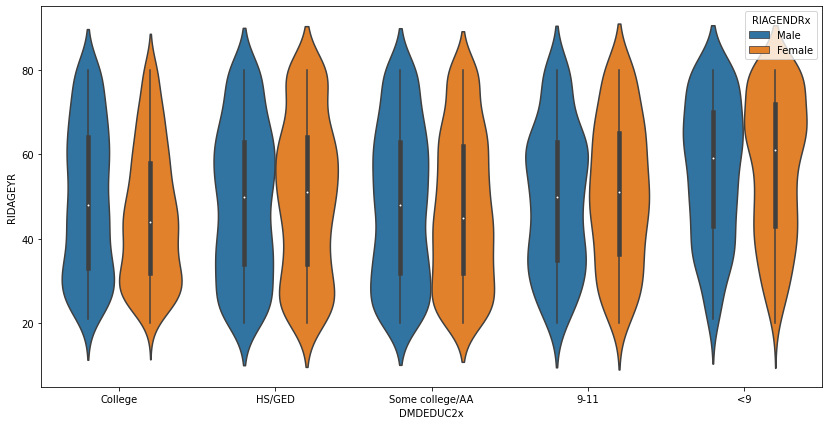

In [60]:
# creating a new variable called 'DMDEDUC2x' that is recoded with text labels
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
db = da.loc[(da.DMDEDUC2x != "Don't know"), :]
plt.figure(figsize=(14, 7))
a=sns.violinplot(x=db.DMDEDUC2x, y=da.RIDAGEYR, hue=da.RIAGENDRx, data=da)

**Notable Observations;**
* The distribution for female college graduates has slightly lower mean and is slightly right-skewed, comapared to that of the men which is more symmetrical with a slightly higher mean
* the mean for the distribution of women who have had less than 9th grade is slightly higher and more slightly left-skewed than that of the men
* The other distributions have intermediate mean values, and are approximately symmetrically distributed.  
* Note also that the female college graduate distribution has a slightly long shoulder, suggesting that this distributions includes a few more women than men who are have gone to college because they are young

### 6. Distributions of BMI by Age

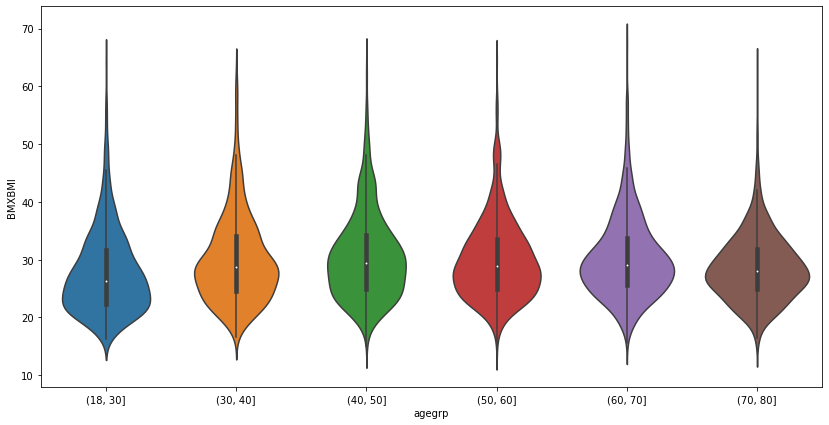

In [69]:
# Stratifying first by age bands
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(14, 7))
a=sns.violinplot(x="agegrp", y=da.BMXBMI, data=da)

**We can see quite clearly that;**
* The distribution for 18-30 age band has a slightly lower mean compared to the other distributions and is right-skewed
* Note however that all distributions have long shoulders, low means and are strongly right skewed, showing that the distributions recorded a low to moderate body mass index across all age bands. This suggests that there is very little correlation between BMI and age


### 7. Distributions of BMI by Gender and Age

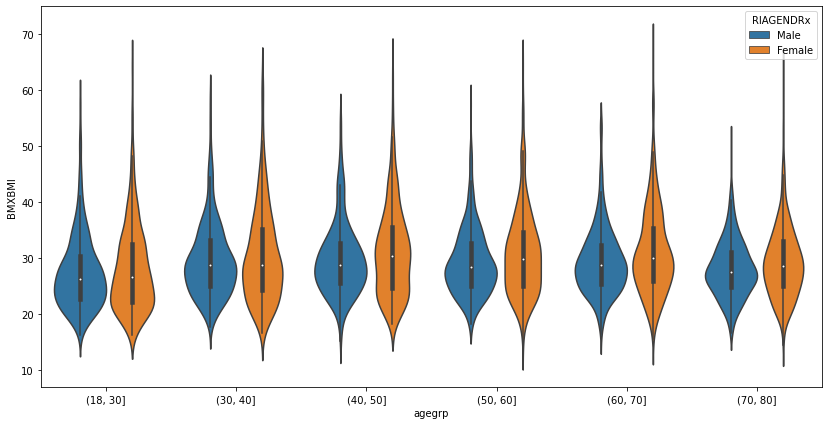

In [67]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(14, 7))
a=sns.violinplot(x="agegrp", y=da.BMXBMI, hue=da.RIAGENDRx, data=da)

**From the above plot, we can see that;**
* women have longer shoulders, slightly higher means and are more strongly right skewed compared to men, suggesting that we have a few more women than men recording high body mass index values
* however, on the average all distributions have similar symmetry across all age bands suggesting very little to no relationship between BMI and age across genders

### 8. Table showing Relationship Between Ethnicity & Medical Insurance Cover ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1) and [HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210))

In [74]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White" , 
                                       4: "Non-Hispanic Black" , 5: "Other Races"})

da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"})

dx = da.groupby(["RIDRETH1x"])["HIQ210x"]
dx = dx.value_counts()
dx = dx.unstack() 

#Normalizing the results so values within each ethnic group are proportions that sum to 1.
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))  

HIQ210x             Don't know    No   Yes
RIDRETH1x                                 
Mexican American         0.004 0.858 0.138
Non-Hispanic Black       0.001 0.890 0.109
Non-Hispanic White       0.001 0.931 0.067
Other Hispanic             NaN 0.871 0.129
Other Races              0.003 0.916 0.082


**Notable Observation:** Mexican Americans have the highest rate of being uninsured in the past year